# **Error Analysis for different ways of simulating evolution**

As we can see in **Evolution_ingredient.py**, there are 5 parameters in the function '**evolve**'. Here in this notebook, we are to talk about how to choose the parameter <span style="color: yellow; font-size: 14px;">'**dt**'</span>.

### First, we have to understand what is 'dt'

Though we have various steppers(euler_step, runge_kutta_step, unitary_euler_step, exponential_step), they are all some approximation methods. Generally, 'dt' marks how close we are to the real value. If dt → 0, then we have the real value of time evolution. 

**So,'dt' is not a parameter for our physics system! It's something that describes how accurate we are!**

However, it's impossible to keep reducing 'dt', because it increases the time complexity. **When the accuracy is acceptable, we don't what 'dt' to be too small, so the code can run faster.**

 When 'dt' goes to zero from a rather large number, the accuracy goes from 0 to 1. As can be seen from the following plots, there will usually be a rather sharp **'leap'**, where the accuracy jumps from 0 to 1. 

 - <span style="font-size: 20px;">We want the the leap to happen at larger 'dt'</span>.

If our 'leap dt' is small, that will be good, but not good enough. According to the plot, accuracy exhibits a step-like function, but it is not smooth. When we zoom into some details, we find that this function may be oscillating. We certainly do not want the oscillations to be severe.

- <span style="font-size: 20px;">We want the function to be smooth near zero</span>.



**ps:** <span style="font-size: 12px;">We can't a prior know what is the true value of our result. So, here we use 'Possibility_of_ideal_state' as an alternative. It's a good substitute. </span>.

In [4]:
from Evolution_ingredient import Possibility_of_ideal_state,exponential_step,unitary_euler_step,runge_kutta_step, euler_step
import matplotlib.pyplot as plt

In order to understand 'dt', we need to fix other parameters. Here we choose:
- $ n = 5 $
- $ T = 100 $
- $\delta_0 = 10$ 

In [3]:
print(Possibility_of_ideal_state(5,100,10,0.001,exponential_step))

0.9578422153632531


### The true value is very close to the above answer,'0.95784'.
Read on, and you'll know why I am sure this is vert accurate.
(Because exp-step converges early and is very stable)

### 1. **Euler step**

**ps:** <span style="font-size: 12px;"> I have done some numerical experiments before, that is why I know how to choose different 'dt's to plot a nice plot </span>.

[0.984970283763804, 0.9851836704449146, 0.9852622311948028, 0.9726797577979965, 0.691294934420042, 0.31738972786370945, 0.0836908302440828, 0.0009231787698614236]


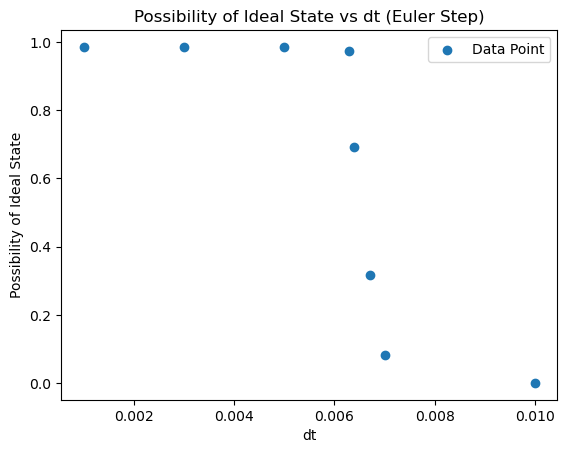

In [6]:
dt_list = [0.001,0.003,0.005,0.0063,0.0064,0.0067,0.007,0.01]
P_list = [Possibility_of_ideal_state(5, 100, 10, dt, euler_step) for dt in dt_list]
print(P_list)
plt.scatter(dt_list, P_list, label='Data Point')
plt.title('Possibility of Ideal State vs dt (Euler Step)')
plt.xlabel('dt')
plt.ylabel('Possibility of Ideal State')
plt.legend()
plt.show()

As shown in this plot, Euler-step is a terrible way to simulate the time evolution:
- The leap happens very late ('late' means it happens at a very small 'dt')，dt ~ 0.006
- The true value is around 0.958, so the result also inaccurate. We have to reach a very very small dt to get a decent result



### 2. **Runge-Kutta-Step**

[0.95768574402259, 0.9543258369151412, 0.9293174030330577, 0.742355671610372, 0.40751529075003146, 0.12680009914329068, 0.0606565937760024, 0.05922605668704506, 0.060421805254806275, 0.07784924612614116, 0.11530885571742387]


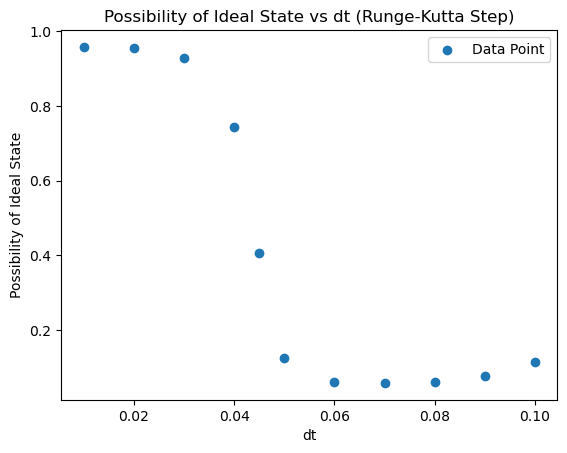

In [7]:
dt_list = [0.01, 0.02, 0.03, 0.04,0.045, 0.05, 0.06, 0.07, 0.08, 0.09,0.1]
P_list = [Possibility_of_ideal_state(5, 100, 10, dt, runge_kutta_step) for dt in dt_list]
print(P_list)
plt.scatter(dt_list, P_list, label='Data Point')
plt.title('Possibility of Ideal State vs dt (Runge-Kutta Step)')
plt.xlabel('dt')
plt.ylabel('Possibility of Ideal State')
plt.legend()
plt.show()

As shown in the picture, Runge-kutta is much better.
- The leap is earlier than euler-step, but not good enough.(Maybe it's because the stepper is not unitary, so it behaves bad at large 'dt')
- Compared with the other two methods, when one wants to sacrifice a little accuracy to get better speed, RK4 will fail. When you change dt from 0.02 to 0.04, the result is not accurate at all!
- It turns out that the accuracy is rather good, after the function converges.

### 3. **Unitary Euler Step**

[0.9495640046993212, 0.9597261582388945, 0.9519266514625881, 0.948338636841763, 0.8990631246821715, 0.7599030442961359, 0.4727416768806342, 0.38660531509689244, 0.19926036354421728, 0.19565207045492827, 0.22303594910621444]


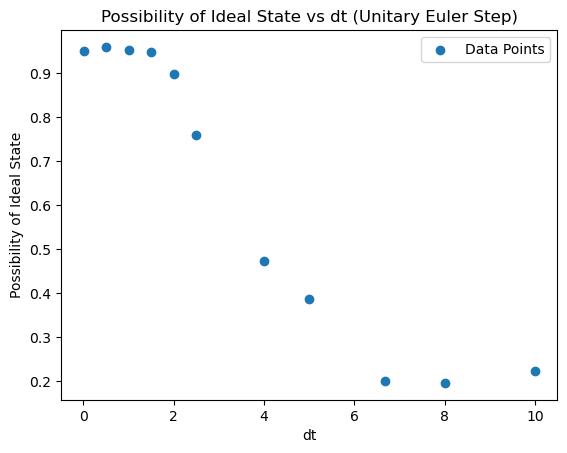

In [10]:
dt_list = [0.01,0.5,1,1.5,2,2.5,4,5,6.67,8,10]
P_list = [Possibility_of_ideal_state(5, 100, 10, dt, unitary_euler_step) for dt in dt_list]
print(P_list)
plt.scatter(dt_list, P_list, label='Data Points')
plt.title('Possibility of Ideal State vs dt (Unitary Euler Step)')
plt.xlabel('dt')
plt.ylabel('Possibility of Ideal State')
plt.legend()
plt.show()

As is shown, Unitary Euler Step has its pros and cons.
- Leap appears very early, around t~2
- Rather large oscillation. The result is not stable, and not accurate enough when zoomed into detail. So we need dt smaller that 0.01 to get satisfactory result.

### 4. **Exponential Step**

[0.9578550963147607, 0.9604653586662908, 0.9503848090262869, 0.9520569831845757, 0.9301768801659908, 0.8719258944498824, 0.6900660734276935, 0.46097881400551527, 0.22805104816030708, 0.041446751224817606]


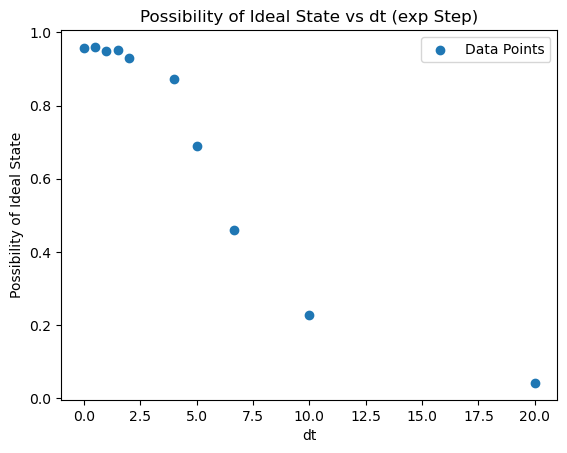

In [11]:
dt_list = [0.01,0.5,1,1.5,2,4,5,6.667,10,20]
P_list = [Possibility_of_ideal_state(5, 100, 10, dt, exponential_step) for dt in dt_list]
print(P_list)
plt.scatter(dt_list, P_list, label='Data Points')
plt.title('Possibility of Ideal State vs dt (exp Step)')
plt.xlabel('dt')
plt.ylabel('Possibility of Ideal State')
plt.legend()
plt.show()

It's good! The leap happens early, around t~2.5. Next we have to zoom into details, trying to see whether the result is stable.

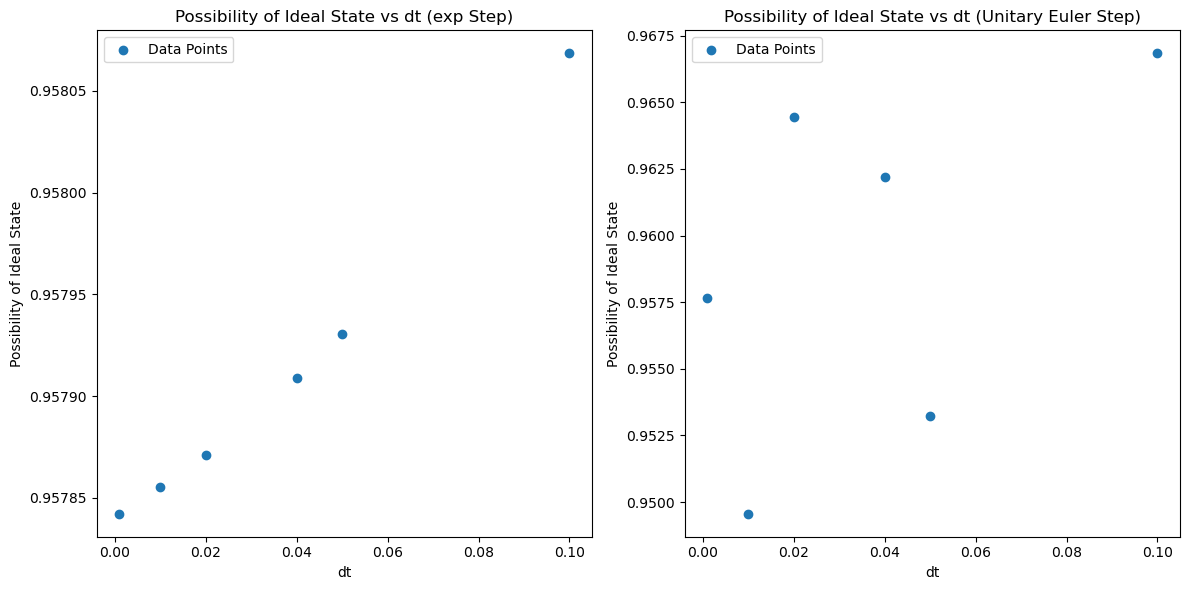

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# exponential step
dt_list_exp = [0.001, 0.01, 0.02, 0.04, 0.05, 0.1]
P_list_exp = [Possibility_of_ideal_state(5, 100, 10, dt, exponential_step) for dt in dt_list_exp]
ax1.scatter(dt_list_exp, P_list_exp, label='Data Points')
ax1.set_title('Possibility of Ideal State vs dt (exp Step)')
ax1.set_xlabel('dt')
ax1.set_ylabel('Possibility of Ideal State')
ax1.legend()

# unitary euler step
dt_list_unitary = [0.001, 0.01, 0.02, 0.04, 0.05, 0.1]
P_list_unitary = [Possibility_of_ideal_state(5, 100, 10, dt, unitary_euler_step) for dt in dt_list_unitary]
ax2.scatter(dt_list_unitary, P_list_unitary, label='Data Points')
ax2.set_title('Possibility of Ideal State vs dt (Unitary Euler Step)')
ax2.set_xlabel('dt')
ax2.set_ylabel('Possibility of Ideal State')
ax2.legend()

plt.tight_layout()
plt.show()

It is evident that the stability of **exp-step** is much better. To ensure the accuracy of the evolution results, we can use a relatively large dt with **exp-step**, which can achieve (or even surpass) the precision of a relatively small dt with **unitary-euler-step**

It's also good to compare the time complexity.

In [17]:
import time

start_time = time.time()
a = Possibility_of_ideal_state(5, 100, 10, 0.1, exponential_step)
end_time = time.time()
exponential_step_time = end_time - start_time
print(f"exponential_step time: {exponential_step_time:.6f} sec")
print(f"exponential_step result: {a:.6f} ")

start_time = time.time()
a = Possibility_of_ideal_state(5, 100, 10, 0.01, runge_kutta_step)
end_time = time.time()
exponential_step_time = end_time - start_time
print(f"rk4 time: {exponential_step_time:.6f} sec")
print(f"rk4 result: {a:.6f} ")

# 测量 Possibility_of_ideal_state(5, 100, 10, 0.001, unitary_euler_step) 的耗时
start_time = time.time()
b = Possibility_of_ideal_state(5, 100, 10, 0.001, unitary_euler_step)
end_time = time.time()
unitary_euler_step_time = end_time - start_time
print(f"unitary_euler_step time: {unitary_euler_step_time:.6f} sec")
print(f"unitary_euler_step result: {b:.6f} ")

exponential_step time: 0.495510 秒
exponential_step result: 0.958068 
rk4 time: 2.798637 秒
rk4 result: 0.957686 
unitary_euler_step time: 24.505033 秒
unitary_euler_step result: 0.957656 


With almost the same accuracy, exp has the best speed!

## As a conclusion, Exponential-step is the best!

我用中文简单总结一下。如果要达到很高的精度（在这个例子里或许是小数点后8位），其实rk4和exp没有本质上的速度差别，可能rk4还快一点点。但是我们并不需要这么高的精度，我们希望舍弃一些accuracy去换取speed，在这种情况下，rk4就变得很糟糕，甚至不如unitary。而exp在这方面做的是最好的，最好地兼顾了精度和耗时。

If we aim for very high precision (perhaps 8 decimal places in this example), there is essentially no speed difference between rk4 and exp—rk4 might even be slightly faster. However, we don't need such high precision; we prefer to trade some accuracy for speed. In this case, rk4 becomes very poor, even worse than unitary. On the other hand, exp performs the best in this regard, striking the best balance between accuracy and time consumption.

### Then, it's good to discuss how to choose 'dt' for a given T, when using exp-step.

For a time-evolution operator, there is:
$$
U(t, t_0) = \mathcal{T} \exp\left(-i \int_{t_0}^{t} H(t') dt'\right)
$$
When we choose dt to be small, we can assum that, in a short time, H doesn't change must so different H(t) can be regarded commutable. 

In a $\delta t$, the change of hamitonian $ \Delta H =\dfrac{2 \delta_0 \cdot dt}{T} $, so we what $\delta t$ << T

According to this approximation, we can cancel out the time-ordering operator $\mathcal{T}$.

$$
\int_{t_0}^{t+\delta t} H(t') dt' = \int_{t_0}^{t+\delta t} (H(t_0)+t'H_s) dt'
= H(t_0)\delta t + \dfrac{1}{2} H_s \cdot (\delta t)^2
$$

However, in our code, we approximated that $H$ remains $H(t_0)$, which means we ignored the second term.
So, if we want higher accuracy, we may want dt to be less than 1.Here is a numerical simulation:



In [20]:
# We think when dt/T = 1/10000, the result is accurate enough
# (dt/T = 0.001,and it doesn't change in our experiment)

# T = 10, dt = 0.01 
Error1 = abs(Possibility_of_ideal_state(5,10,10,0.0001,exponential_step)-Possibility_of_ideal_state(5,10,10,0.01,exponential_step))
print('dt=0.01, error:',Error1)

# T = 100, dt = 0.1 
Error1 = abs(Possibility_of_ideal_state(5,100,10,0.001,exponential_step)-Possibility_of_ideal_state(5,100,10,0.1,exponential_step))
print('dt=0.1, error:',Error1)

# T = 1000, dt = 1    
Error2 = abs(Possibility_of_ideal_state(5,1000,10,0.01,exponential_step)-Possibility_of_ideal_state(5,1000,10,1,exponential_step))
print('dt=1, error:',Error2)

# T = 10000, dt = 10
Error3 = abs(Possibility_of_ideal_state(5,10000,10,0.1,exponential_step)-Possibility_of_ideal_state(5,10000,10,10,exponential_step))
print('dt=10, error:',Error3)


dt=0.01, error: 0.0012872652056372669
dt=0.1, error: 0.00022613868026166717
dt=1, error: 0.0039248670087338455
dt=10, error: 0.011296047021803535
